# PRODIGY_DS_04
PROBLEM STATEMENT:-
Analyse and visualize sentiment patterns in social media data to understand public opinion towards specific topics or brands.

In [ ]:
#Importing the required PYTHON libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the TWITTER dataset
df=pd.read_csv(r'/content/twitter_training.csv')
df

,ID,Game,Sentiment,Review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
68427,3717,Cyberpunk2077,Positive,LETS N GOOOOOOOOOO
68428,3717,Cyberpunk2077,Positive,she LETS IN FUCKING OF GOOOOOOOOOO
68429,3717,Cyberpunk2077,Positive,LETS FUCKING LI
68430,3718,Cyberpunk2077,Positive,I can’t wait for this to come out


In [ ]:
#Checking for null values
df.isnull().sum()

ID             0
Game           0
Sentiment      0
Review       602
dtype: int64

**Observation:** We Observe that "Review" has 602 null values.

In [ ]:
#Checking the basic statistics of the dataset.
df.describe()

,ID
count,68432.000000
mean,6250.292407
std,3760.727632
min,1.000000
25%,2930.000000
50%,6161.000000
75%,9463.000000
max,13200.000000


In [ ]:
#Checking the data type of the variables
df.dtypes

ID            int64
Game         object
Sentiment    object
Review       object
dtype: object

In [ ]:
df.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [ ]:
#Replacing all the missing values or null values with the mode(measure of central tendency)
df['Review'].fillna(df['Review'].mode()[0], inplace=True)

In [ ]:
df

,ID,Game,Sentiment,Review
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
68427,3717,Cyberpunk2077,Positive,LETS N GOOOOOOOOOO
68428,3717,Cyberpunk2077,Positive,she LETS IN FUCKING OF GOOOOOOOOOO
68429,3717,Cyberpunk2077,Positive,LETS FUCKING LI
68430,3718,Cyberpunk2077,Positive,I can’t wait for this to come out


In [ ]:
#Checking if there are any null values present even after replacing them.
df.isna().sum()

ID           0
Game         0
Sentiment    0
Review       0
dtype: int64

In [ ]:
df_Sentiment=df['Sentiment'].value_counts()
df_Sentiment

Negative      20862
Positive      18728
Neutral       16320
Irrelevant    12522
Name: Sentiment, dtype: int64

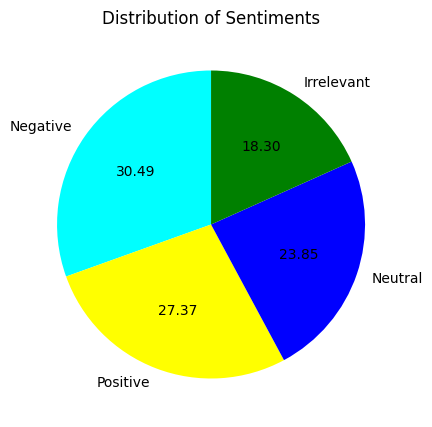

In [ ]:
#Visualizing Distribution of sentiments towards different entities in a pie chart
plt.figure(figsize=(11,5))
plt.pie(df_Sentiment, labels=df_Sentiment.index,colors=['cyan','yellow','blue','green'],autopct='%.2f',startangle=90)#Autopct is used to round of and view the value
plt.title('Distribution of Sentiments')
plt.show()

Observation:-We observe that there are:
27% of positive sentiments

* 27% of positive sentiments
* 30% of negative sentiments
* 17% of irrelevent sentiments
* 24% of neutral comments

In [ ]:
df_game=df['Game'].value_counts()
df_game

Microsoft                            2400
TomClancysRainbowSix                 2400
MaddenNFL                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
ApexLegends                          2376
CallOfDutyBlackopsColdWar            2376
Facebook                             2370
Dota2                                2364
WorldOfCraft                         2364
NBA2K                                2352
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
HomeDepot                            2310
PlayStation5(PS5)                    2310
GrandTheftAuto(GTA)                  2304
CS-GO                                2304
Google                               2298
Hearthstone                       

In [ ]:
# Finding the top 5 twitter game distribution
top5_gamescount=df['Game'].value_counts().sort_values(ascending=False)[:5]
top5_gamescount

Microsoft               2400
TomClancysRainbowSix    2400
MaddenNFL               2400
LeagueOfLegends         2394
CallOfDuty              2394
Name: Game, dtype: int64

In [ ]:
#Calculate sentiment counts for each game
sentiment_counts = df.groupby(['Game','Sentiment']).size().unstack(fill_value=0)

#Summing Up sentiment counts for each game
game_sentiment_counts = sentiment_counts.groupby('Game').sum()

#Calculate total sentiment counts for each game
game_total_sentiments = game_sentiment_counts.sum(axis=1)

#Select top 5 game based on total sentiment counts
top_5_game = game_total_sentiments.nlargest(5).index

#Filter sentiment counts for 5 games
top_5_game_sentiments = game_sentiment_counts.loc[top_5_game]


<Figure size 1100x1600 with 0 Axes>

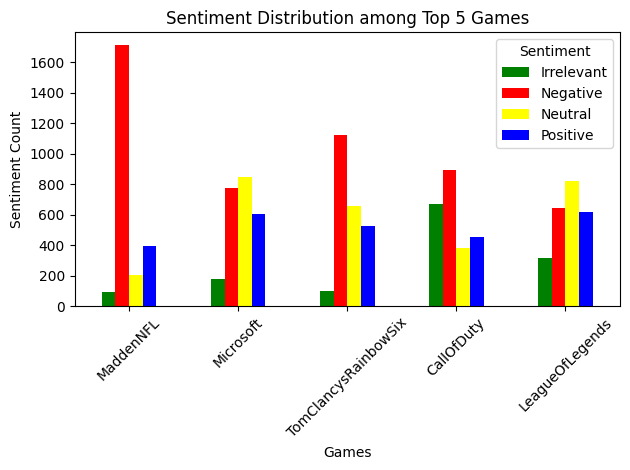

In [ ]:
# Create a bar chart for sentiment distribution among top 5 entities
plt.figure(figsize=(11,16))
top_5_game_sentiments.plot(kind='bar',color=("green","red","yellow","blue"))
plt.xlabel('Games')
plt.ylabel('Sentiment Count')
plt.title('Sentiment Distribution among Top 5 Games')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:-**

We observe that:
* In Madden NFL: Maximum Negative sentiment response
* Microsoft: Maximum Neutral sentiment response
* TomClancysRainbowSix: Maximum Negative sentiment response
* Call Of Duty: Maximum Negative sentiment response
* League Of Legands:  Maximum Neutral sentiment response

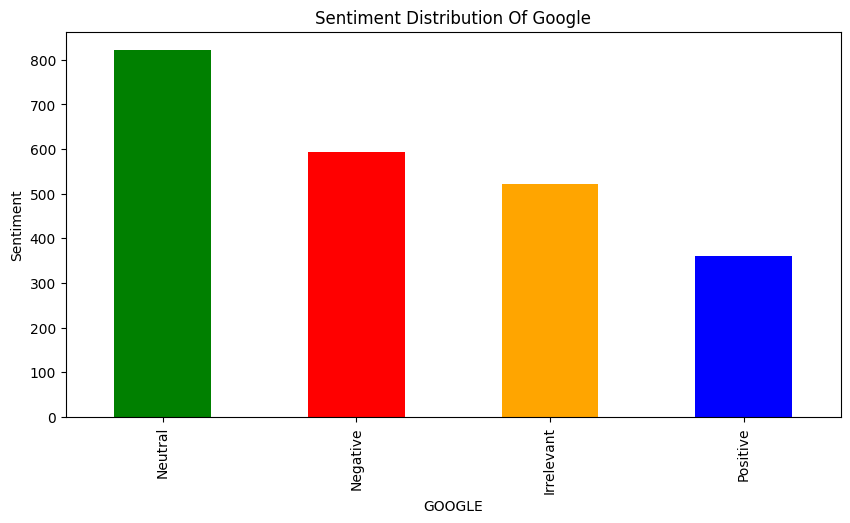

In [ ]:
#Plotting the sentiment distribution towards Google in a bar chart
game_data=df[df['Game']=='Google']
plt.figure(figsize=(10,5))
sentiment_counts=game_data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar',color=['green', 'red', 'orange','blue'])
plt.xlabel('GOOGLE')
plt.ylabel('Sentiment')
plt.title("Sentiment Distribution Of Google")
plt.show()

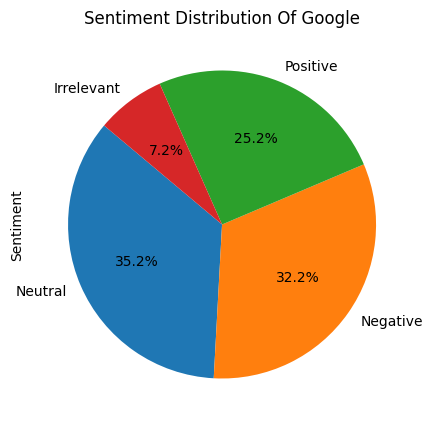

In [ ]:
#Plotting the sentiment distribution of Microsoft in a bar chart
game_data=df[df['Game']=='Microsoft']
plt.figure(figsize=(10,5))
sentiment_counts=game_data['Sentiment'].value_counts()
sentiment_counts.plot(kind='pie',autopct='%.1f%%', startangle=140)
plt.title("Sentiment Distribution Of Google")
plt.show()

Observation:-
We observe that there are maximum neutral sentiments related to Microsoft.